In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!mv kaggle.json /root/.kaggle/kaggle.json

In [7]:
!ls /root/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 178MB/s]
100% 1.06G/1.06G [00:05<00:00, 228MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'2.13.0'

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train/",
    batch_size=32,
    image_size=(256, 256),
    labels="inferred",
    label_mode="int"

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test/",
    batch_size=32,
    image_size=(256, 256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#normalization
def process(image, label):
    tf.cast(image/255, tf.float32) # scaling down images to 0-1
    return image, label

train_ds.map(process)
validation_ds.map(process)


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model=Sequential()

In [16]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))




In [17]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [23]:
model.fit(train_ds, epochs=2, validation_data=validation_ds, batch_size=128)

Epoch 1/2
625/625 [==============================] - 56s 89ms/step - loss: 0.6861 - accuracy: 0.5436 - val_loss: 0.6923 - val_accuracy: 0.5360
Epoch 2/2
625/625 [==============================] - 52s 83ms/step - loss: 0.6699 - accuracy: 0.5617 - val_loss: 0.7044 - val_accuracy: 0.5420


In [24]:
model.save("/content/dog_cat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import matplotlib.pyplot as plt

In [26]:
test1_img = plt.imread(r"/content/dogs_vs_cats/catordog/1.jpg")

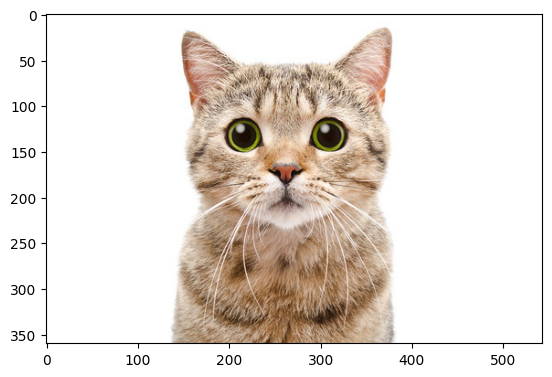

In [27]:
plt.imshow(test1_img)

In [28]:
test1_img.shape

(360, 543, 3)

In [29]:
import cv2

In [31]:
test2_img = plt.imread(r"/content/dogs_vs_cats/catordog/2.jpg")

In [32]:
test1_img_resize = cv2.resize(test1_img, (256, 256))
test2_img_resize = cv2.resize(test2_img, (256, 256))

In [33]:
test1_img_resize.shape
test2_img_resize.shape

(256, 256, 3)

In [34]:
test1_img_resize=test1_img_resize.reshape(1,256,256,3)
test2_img_resize=test2_img_resize.reshape(1,256,256,3)

In [35]:
model.predict(test1_img_resize)

1/1 [==============================] - 0s 239ms/step


array([[0.5093706]], dtype=float32)

In [ ]:
#creating image augmentation...

In [37]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [41]:
myimg = image.load_img(r"/content/dogs_vs_cats/catordog/1.jpg", target_size=(200,200))

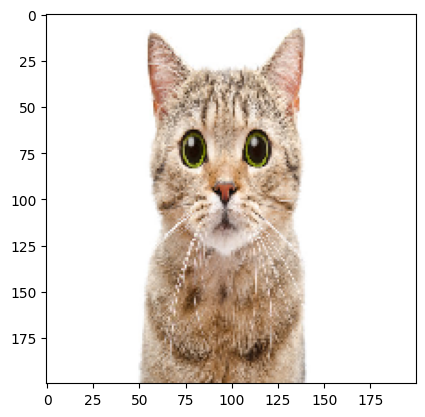

In [42]:
plt.imshow(myimg)

In [43]:
#cerating numpy array..
type(myimg)

PIL.Image.Image

In [44]:
#converting img into numpy
image.img_to_array(myimg)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [55]:
img = image.img_to_array(myimg)

In [56]:
type(img)

numpy.ndarray

In [57]:
datagen = ImageDataGenerator( rotation_range = 30,
    shear_range = 0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [58]:
img.shape

(200, 200, 3)

In [59]:
input_image = img.reshape(1,200,200,3)

In [60]:
input_image.shape

(1, 200, 200, 3)

In [63]:
i=0
for output in datagen.flow(input_image, save_to_dir="/content/augmented_image"):
  i=i+1

  if i == 10:
    break

In [65]:
train_datagen=ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255
) # creating generator settings for train dataset...

In [78]:
train_generator = train_datagen.flow_from_directory(
    "/content/dogs_vs_cats/train",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
) # training augmented images reading

Found 20000 images belonging to 2 classes.


In [79]:
#creating augmented imgs for test generator..
test_generator = train_datagen.flow_from_directory(
    "/content/dogs_vs_cats/test",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
) # training augmented images reading

Found 5000 images belonging to 2 classes.


In [85]:
model=Sequential()

In [86]:
# this is my first convolution layer
model.add(Conv2D(24,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(36,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(48,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(64,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))




In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 36)        7812      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 36)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 48)        15600     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 48)       

In [88]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [89]:
model.fit_generator(train_generator, epochs=2, validation_data=test_generator)

<ipython-input-89-3434a8015c34>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=2, validation_data=test_generator)


Epoch 1/2
1334/1334 [==============================] - 180s 133ms/step - loss: 0.6562 - accuracy: 0.5901 - val_loss: 0.6036 - val_accuracy: 0.6930
Epoch 2/2
1334/1334 [==============================] - 172s 129ms/step - loss: 0.5445 - accuracy: 0.7234 - val_loss: 0.4898 - val_accuracy: 0.7630
